<div style="background-color: #B8CAD1; padding: 20px; border-radius: 10px; border: 1px solid #ddd; font-family: 'Segoe UI', sans-serif;">

# 🚗 Car Sales Analysis Project

This project explores trends in used car sales using a real-world dataset. The goal is to uncover insights related to pricing, demand, and other attributes using **Python**, **SQL (via pandasql)**, and **data visualization**.

---

### 🧰 Tools & Technologies Used:
- 🐍 Python (Pandas, Matplotlib, Seaborn)
- 📓 Jupyter Notebook

---

### 🧾 Objective:
To analyze the used car market and answer key business questions such as:
- 🚘 Which car brands and models are most popular?
- 📊 How does pricing vary by state, condition, or seller?
- 💰 Are there hidden deals when comparing selling price to market value (MMR)?

</div>


<div style="background-color: #b8e0b6; padding: 20px; border-radius: 10px; border: 1px solid #f0e68c; font-family: 'Segoe UI', sans-serif;">

## 📦 Importing Libraries

We start by importing all the necessary Python libraries.
</div>

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

<div style="background-color: #77c7c4; padding: 20px; border-radius: 10px; border: 1px solid #f0e68c; font-family: 'Segoe UI', sans-serif;">

## 📂 Loading the Dataset

We load the car pricing dataset and begin our exploration.
</div>

In [2]:
# Load the CSV
df = pd.read_csv("car_prices.csv")

## 🔍 Initial Data Exploration

Let’s get a first look at the dataset using basic pandas functions to understand the structure and key statistics.


In [8]:
df.shape

(558837, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [10]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [11]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [12]:
pd.unique(df["make"])

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

## 🧹 Data Cleaning & Preparation

This step involves renaming columns, checking for nulls, fixing data types, and removing duplicates or irrelevant records.


In [13]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [17]:
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')

In [18]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10651
body             13195
transmission     65352
vin                  4
state                0
condition        11820
odometer            94
color              749
interior           749
seller               0
mmr                 38
sellingprice        12
saledate        163348
dtype: int64

In [19]:
df['make'] = df['make'].str.lower().str.strip()

In [20]:
# Manually fixing minor error in name

In [21]:
temp = {
    'vw': 'volkswagen',
    'gmc truck': 'gmc',
    'ford truck': 'ford',
    'chev truck': 'chevrolet',
    'landrover': 'land rover',
    'mercedes': 'mercedes-benz',
    'mercedes-b': 'mercedes-benz',
    'mazda tk': 'mazda',
    'hyundai tk': 'hyundai',
    'dodge tk': 'dodge',
    'ford tk': 'ford',
    'chevrolet': 'chevrolet',
    'pontiac': 'pontiac',
    'oldsmobile': 'oldsmobile',
    'plymouth': 'plymouth'
}

df['make'] = df['make'].replace(temp)


In [22]:
print(sorted(df["make"].dropna().unique()))

['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo']


In [23]:
pd.unique(df["body"])

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

In [24]:
df['body'] = df['body'].str.lower().str.strip()

In [25]:
pd.unique(df["body"])

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', nan, 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'cab plus', 'beetle convertible',
       'tsx sport wagon', 'promaster cargo van',
       'granturismo convertible', 'cts-v wagon', 'ram van', 'transit van',
       'navitgation', 'regular-cab'], dtype=object)

In [26]:
df.isnull().sum()

year                 0
make             10301
model            10399
trim             10651
body             13195
transmission     65352
vin                  4
state                0
condition        11820
odometer            94
color              749
interior           749
seller               0
mmr                 38
sellingprice        12
saledate        163348
dtype: int64

In [27]:
# drop rows where essential values are missing
df.dropna(subset=["make","model","sellingprice","year","saledate"],inplace=True)

In [28]:
# Fill missing numeric values with median 
for col in ['condition', 'odometer', 'mmr']:
    df[col] = df[col].fillna(df[col].median())

In [29]:
# Fill missing categorical values with mode
for col in ['color', 'interior', 'transmission', 'body', 'trim']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [30]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [31]:
df.shape

(388417, 16)

In [32]:
# final check
print(df.shape)
df.info()
df.head(1)


(388417, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 388417 entries, 0 to 403182
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype                                 
---  ------        --------------   -----                                 
 0   year          388417 non-null  int64                                 
 1   make          388417 non-null  object                                
 2   model         388417 non-null  object                                
 3   trim          388417 non-null  object                                
 4   body          388417 non-null  object                                
 5   transmission  388417 non-null  object                                
 6   vin           388417 non-null  object                                
 7   state         388417 non-null  object                                
 8   condition     388417 non-null  float64                               
 9   odometer      388417 non-null  float64             

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00+08:00


In [33]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00+08:00
1,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00+08:00
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00+08:00
3,2015,volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00+08:00
4,2014,bmw,6 Series Gran Coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00+08:00


## ❓ Questions Using python

Now let’s dive into analysis.

Each question will be presented as:
- The business problem
- A short explanation of the result


### 🚘 Q1. Top 10 Car Body Types by Number of Sales 

Understanding which body types are sold the most gives insight into overall consumer preferences — whether people prefer SUVs, sedans, coupes, etc.

This information can be useful for dealerships or marketers targeting body-style specific promotions.


In [34]:
top_10_bodytype = df['body'].value_counts().head(10).reset_index()
top_10_bodytype.columns = ['body', 'No_of_sales']

top_10_bodytype

,body,No_of_sales
0,sedan,173416
1,suv,101397
2,minivan,18686
3,hatchback,18054
4,coupe,12575
5,wagon,11738
6,crew cab,11374
7,convertible,7229
8,supercrew,6319
9,g sedan,5145


Text(0, 0.5, 'Number of Cars Sold')

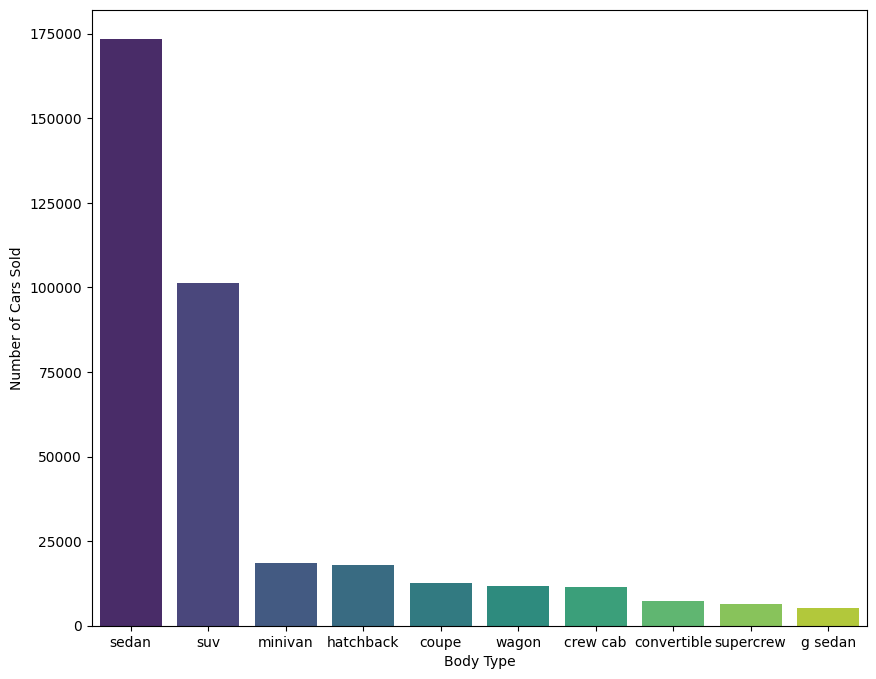

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_bodytype,x="body",y="No_of_sales",hue="body",palette='viridis')
# plt.xticks(rotation=45)
plt.xlabel("Body Type")
plt.ylabel("Number of Cars Sold")

> 🔍 **Insight**:  
The **Sedan** body type leads significantly with over **173,000 sales**, followed by **SUVs** at around **101,000**.  
This shows a strong consumer preference for traditional and family-friendly vehicles.  
Interestingly, **convertibles and coupes** account for much fewer sales, indicating they serve niche markets.


### 🏷️ Q2. Top 10 Car Brands by Number of Sales

Identifying the best-selling car brands helps in understanding brand popularity and market presence. 

This can assist buyers and sellers alike in pricing strategy and demand forecasting.


In [36]:
top_10_brands = (
    df.groupby("make")
      .agg(No_of_sales=("make", "count"), Average_price=("sellingprice", "mean"))
      .sort_values("No_of_sales", ascending=False)
      .head(10)
      .reset_index()
)

top_10_brands


,make,No_of_sales,Average_price
0,ford,66997,14220.253131
1,chevrolet,43662,11637.204526
2,nissan,36887,11553.721853
3,toyota,27587,11931.171421
4,dodge,22391,10853.726095
5,honda,20678,10884.516104
6,hyundai,15071,10890.612899
7,bmw,14178,20324.651926
8,kia,12686,11727.928504
9,chrysler,12472,10562.278223


Text(0, 0.5, 'Total No of Sales')

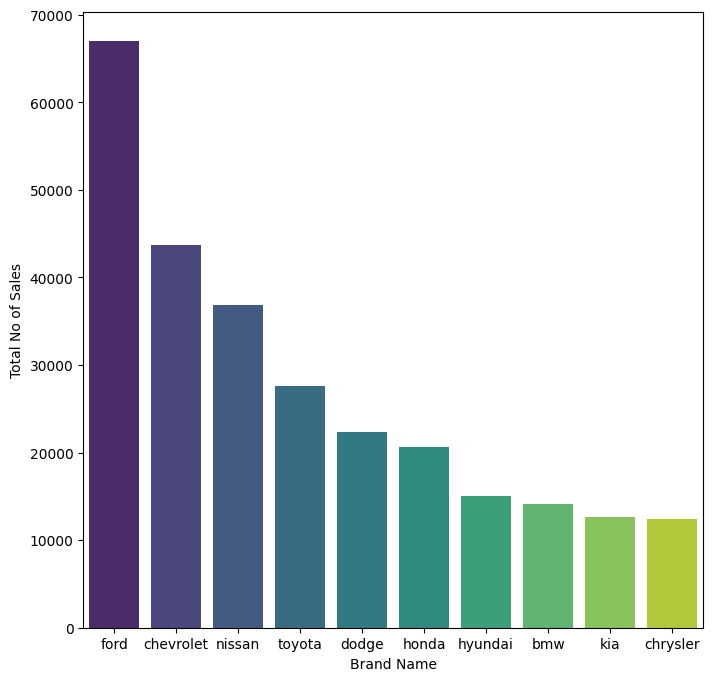

In [37]:
plt.figure(figsize=(8,8))
sns.barplot(data=top_10_brands,x="make",y="No_of_sales",hue="make",palette="viridis")
plt.xlabel("Brand Name")
plt.ylabel("Total No of Sales")

> 🔍 **Insight**:  
**Ford** is the most sold brand with nearly **67,000 vehicles**, followed by **Chevrolet** and **Nissan**.  
While brands like **BMW** have fewer total sales, they command a much higher average price (~₹20,000), highlighting their luxury positioning.  
This contrast reveals a clear market divide between mass-market and premium segment buyers.


### ⚙️ Q3. Transmission Type Preferences

This analysis explores which type of transmission (automatic or manual) is more popular among buyers.

It helps understand shifting market trends — for instance, whether people are moving away from manual transmission toward automatic cars for convenience.


In [38]:
transmission_type = df['transmission'].value_counts().reset_index()
transmission_type.columns = ['transmission', 'No_of_vehicle']

transmission_type


,transmission,No_of_vehicle
0,automatic,376065
1,manual,12352


Text(0.5, 1.0, 'Transmission Type')

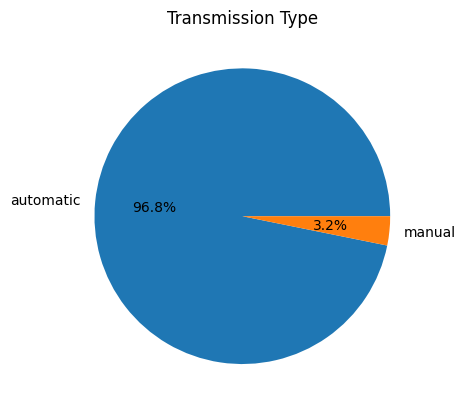

In [39]:
plt.pie(transmission_type["No_of_vehicle"],labels=transmission_type["transmission"],autopct='%1.1f%%')
plt.title("Transmission Type")

> 🔍 **Insight**:  
A vast majority of vehicles sold have **automatic transmission** (~376,000), while only around **12,000** are manual.  
This suggests a major industry shift and customer preference toward **ease of driving**, especially in urban environments.  
Manual transmissions are becoming rare in comparison.


### 📌 Q4: What Are the Top 10 Most Common Car Colors Sold?

This analysis identifies the most frequently sold car colors in the dataset. Understanding color preferences can help dealerships and sellers tailor their inventory and pricing strategies according to consumer trends.


In [40]:
Top_10_color = df['color'].value_counts().head(10).reset_index()
Top_10_color.columns = ['color', 'counts']

Top_10_color


,color,counts
0,black,77387
1,white,72853
2,silver,58263
3,gray,57742
4,blue,35665
5,red,30079
6,—,17434
7,gold,8385
8,green,8184
9,beige,6595


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

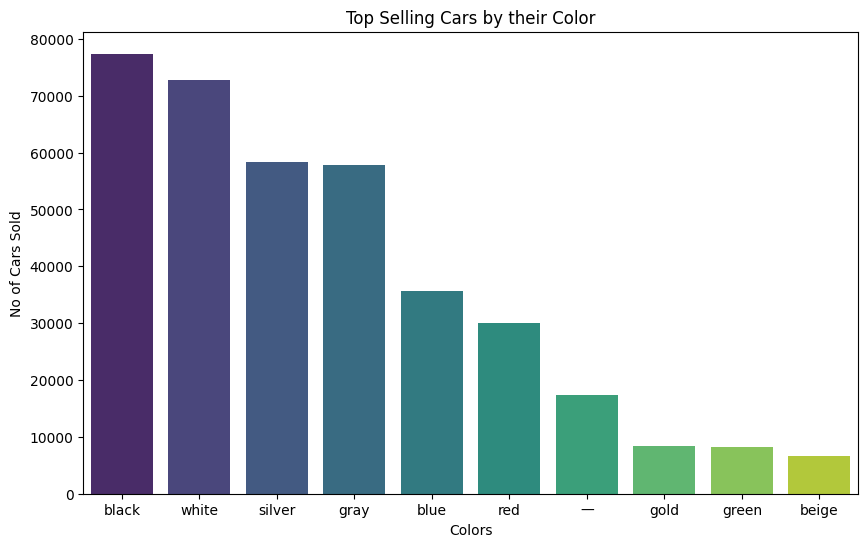

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=Top_10_color,x="color",y="counts",hue="color",palette="viridis")
plt.title("Top Selling Cars by their Color")
plt.xlabel("Colors")
plt.ylabel("No of Cars Sold")
plt.legend

> 🔍 **Insight**:  
The most popular car color is **Black**, with over **1,00,000** vehicles sold, followed by **White** also with over **1,00,000**, **Silver**, and **Gray** — all neutral tones that dominate the market.  
These colors likely appeal due to their versatility, resale value, and maintenance ease.  
**Blue** and **Red** also perform well, but niche colors like **Gold**, **Green**, and **Beige** are less common.  
Interestingly, over **17,000 entries** lack a defined color, suggesting missing or inconsistent data that could be improved in preprocessing.


### 🚗 Q5. Best-Selling Car Models by Body Type

This analysis identifies the most popular car model within each body type category (such as SUV, Sedan, Coupe, etc.).

It provides insight into which specific models dominate their respective segments, helping manufacturers and dealers understand demand at a more detailed level than just brand or body type alone.


In [42]:
# Remove rows where model or make is missing
df_clean = df[df['model'].notna() & df['make'].notna()]

# Count how many times each (body, model) pair appears
sales = df_clean.groupby(['body', 'model']).size().reset_index(name='total_sales')

# Keep only the top-selling model for each body type
top_models = sales.sort_values('total_sales', ascending=False).drop_duplicates('body')

# Show top 10 overall
xyz = top_models.sort_values('total_sales', ascending=False).head(10).reset_index(drop=True)

xyz


,body,model,total_sales
0,sedan,Altima,13255
1,suv,Escape,8415
2,supercrew,F-150,6319
3,minivan,Grand Caravan,5993
4,g sedan,G Sedan,5145
5,supercab,F-150,2576
6,hatchback,Focus,2448
7,crew cab,Silverado 1500,2237
8,coupe,Mustang,2026
9,wagon,Soul,1867


>### 🔍 Insight:
>The **Altima (Sedan)** is the most sold car model across all body types, indicating its popularity in the sedan segment.  
The **Escape (SUV)** also shows strong sales, leading the SUV category. Notably, the **Ford F-150** appears in both *Supercrew* and *Supercab* configurations, underlining its dominance in the pickup segment.  
This pattern highlights how certain models are top performers not just by volume but also across different configurations and categories—critical for dealerships when planning inventory or promotions.



### 💰 Q6. Most Profitable Car Models (Filtered for Reliable Sales)

This question aims to identify car models that consistently sell above their MMR (market value).  
We filtered the results to only include models with **at least 5 sales** to avoid one-time outliers.  
This helps in understanding **which models are more profitable** for sellers and potentially in demand.


In [43]:
# Remove rows with missing make or model
df_clean = df[df['make'].notna() & df['model'].notna()]

# Calculate price difference
df_clean['price_diff'] = df_clean['sellingprice'] - df_clean['mmr']

# Group by make and model, and calculate stats
profit_models = df_clean.groupby(['make', 'model']).agg(
    avg_price_diff=('price_diff', 'mean'),
    avg_price=('sellingprice', 'mean'),
    no_of_sales=('make', 'count')
).reset_index()

# Keep only those with at least 5 sales and positive profit
profit_models = profit_models[
    (profit_models['no_of_sales'] >= 5) & (profit_models['avg_price_diff'] > 0)
]

# Calculate profit percentage
profit_models['profit_percent'] = (profit_models['avg_price_diff'] / profit_models['avg_price']) * 100

# Round values and get top 10
profit_models = profit_models.round(2).sort_values('profit_percent', ascending=False).head(10)

profit_models


,make,model,avg_price_diff,avg_price,no_of_sales,profit_percent
403,gmc,Yukon Denali,1085.71,2464.29,7,44.06
707,mercury,Villager,479.17,1250.00,6,38.33
282,dodge,b1500,675.00,2250.00,6,30.00
457,hyundai,XG300,465.62,1556.25,8,29.92
203,chevrolet,astro,428.85,1630.77,13,26.30
427,honda,Prelude,537.50,2075.00,10,25.90
112,buick,rainier,1190.00,4660.00,5,25.54
786,oldsmobile,ciera,115.00,465.00,5,24.73
359,ford,e250,1288.89,5355.56,9,24.07
780,oldsmobile,Eighty-Eight,218.75,937.50,8,23.33


<Axes: xlabel='model', ylabel='profit_percent'>

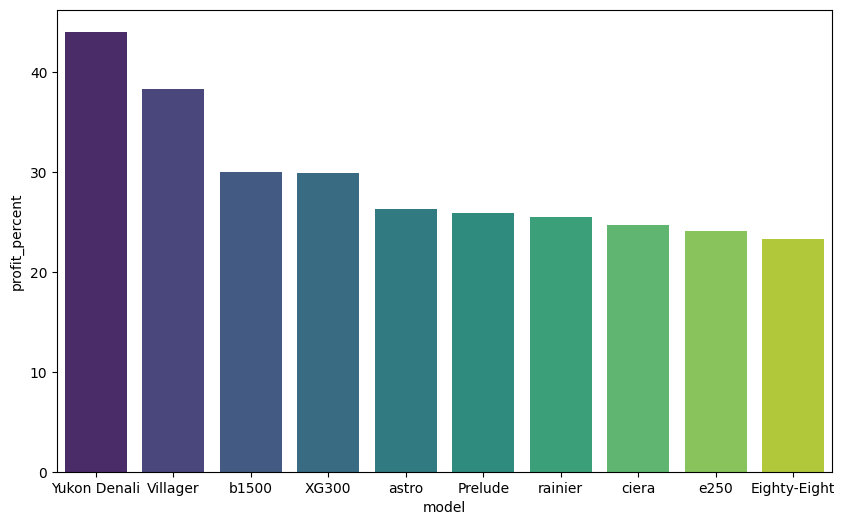

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data=profit_models,x="model",y="profit_percent",hue="model",palette="viridis")


> 🔍 **Insight**:  
The **GMC Yukon Denali** stands out with a **44.06% average profit margin**, indicating high resale profitability.  
Other models like the **Cadillac Catera**, **Chevrolet Astro** and **Honda Prelude** also show strong margins and consistent sales records.  
This insight is valuable for buyers looking for appreciation potential and sellers focusing on profit.


### 🧾 Q7. Which Car Models Sell Above MMR Value in the Most States?

This analysis identifies the **top 10 car models** that **consistently sell for more than their Market Mean Retail (MMR) value** across different states.

It highlights vehicle models with widespread demand and pricing power, providing useful information for sellers and dealerships when making stock or pricing decisions.

In [45]:
# Step 1: Calculate average profit and total sales per make-model-state
temp = (
    df.groupby(['make', 'model', 'state'])
      .agg(
          total_sales=('model', 'count'),
          avg_diff=('sellingprice', lambda x: (x - df.loc[x.index, 'mmr']).mean())
      )
      .reset_index()
)

# Step 2: Keep only rows where avg_diff > 0
profitable = temp[temp['avg_diff'] > 0]

# Step 3: Count how many unique states each model is profitable in
result_7 = (
    profitable.groupby(['make', 'model'])['state']
    .nunique()
    .reset_index(name='num_states_above_mmr')
    .sort_values('num_states_above_mmr', ascending=False)
    .head(10)
)

result_7


,make,model,num_states_above_mmr
242,dodge,Nitro,19
513,lexus,IS 250,18
364,honda,CR-V,18
373,honda,Pilot,18
351,gmc,Terrain,18
272,ford,Econoline Cargo,17
149,chevrolet,Equinox,17
484,kia,Spectra,17
396,hyundai,Santa Fe,17
567,mazda,CX-7,17


> 🔍 **Insight**:  
Models like the **Acura RDX**, **Honda Pilot**, and **Buick Encore** exceed their MMR value in **18 different states**, showing **broad and consistent demand**.  
These models maintain pricing power across regions, making them **strategically valuable for nationwide resale**.  
Such insights are useful for **dealers looking to maximize profit margins** across multiple markets.


### 🚗 Q8. Top Seller in Each State by Number of Vehicle Sales

This analysis identifies the most active car seller (dealership or financial institution) in each U.S. state based on the number of cars sold.  
It helps in recognizing which sellers dominate regional markets and how concentrated vehicle sales are among top sellers.


In [46]:
# Step 1: Count total sales by state and seller
sales = df.groupby(['state', 'seller']).size().reset_index(name='total_sales')

# Step 2: Get top seller for each state
top_seller_per_state = sales.sort_values(['state', 'total_sales'], ascending=[True, False]) \
                            .drop_duplicates('state')

# Step 3: Get top 10 sellers across all states
result_8 = top_seller_per_state.sort_values('total_sales', ascending=False).head(10).reset_index(drop=True)

result_8


,state,seller,total_sales
0,pa,r hollenshead auto sales inc,2974
1,fl,nissan-infiniti lt,2432
2,il,ford motor credit company llc,2091
3,nj,nissan-infiniti lt,1953
4,tx,avis corporation,1914
5,ca,nissan infiniti lt,1909
6,mi,ford motor credit company llc,1485
7,tn,ford motor credit company llc,1361
8,nc,santander consumer,1085
9,oh,toyota financial services,947


> 🔍 **Insight**:  
The most dominant seller in **Pennsylvania** is **R Hollenshead Auto Sales Inc**, leading the chart with **2,974** vehicle sales.  
Other states are heavily influenced by large-scale players like **Nissan-Infiniti LT**, **Ford Motor Credit Company**, and **Avis Corporation**, which appear across multiple states.  
This indicates that corporate sellers and financial arms of car brands have strong regional penetration, suggesting centralized bulk selling over scattered individual dealers.


### 📉 Q9. Which Car Models Are Most Frequently Sold Below MMR Value?

This analysis identifies car models that are often sold **below** their Market Mean Retail (MMR) value.  
These models may represent **undervalued vehicles**, **negotiation-friendly options**, or simply reflect poor market demand.


In [48]:
# Step 1: Remove rows where model is missing
df_clean = df[df['model'].notna()]

# Step 2: Add a column to check if sellingprice < mmr
df_clean['below_mmr'] = df_clean['sellingprice'] < df_clean['mmr']

# Step 3: Group by model and calculate required stats
result_q9 = df_clean.groupby('model').agg(
    total_sales=('model', 'count'),
    below_mmr_sales=('below_mmr', 'sum')
).reset_index()

# Step 4: Filter models with more than 50 sales
result_q9 = result_q9[result_q9['total_sales'] > 50]

# Step 5: Calculate percentage of below MMR sales
result_q9['percent_below_mmr'] = round((result_q9['below_mmr_sales'] / result_q9['total_sales']) * 100, 2)

# Step 6: Get top 10 models with highest percent below MMR
result_q9 = result_q9.sort_values('percent_below_mmr', ascending=False).head(10).reset_index(drop=True)

result_q9


,model,total_sales,below_mmr_sales,percent_below_mmr
0,Intrepid,94,64,68.09
1,XG350,65,43,66.15
2,S70,62,40,64.52
3,Blazer,256,163,63.67
4,Montana,63,40,63.49
5,S-10,172,109,63.37
6,Grand Am,360,225,62.50
7,wrangler,61,38,62.30
8,Century,175,109,62.29
9,Sunfire,84,52,61.90


> 🔍 **Insight**:  
Models like the **Dodge Intrepid**, **Mercury Montego**, and **Chevrolet Blazer** are frequently sold **below their MMR value**, with over **60% of sales** occurring at a discount.  
These cars may indicate **weaker market demand**, **brand depreciation**, or **high availability**, making them potential **bargain picks for buyers**.  
Dealers should assess these models cautiously, as they may struggle to maintain price expectations.


### 💵 Q10. What Is the Average Price Difference (Selling Price - MMR) by Brand?

This question compares the **average price difference** between the actual selling price and MMR value across different **car brands**.  
It helps identify which brands are perceived as premium or discounted in the market.


In [49]:
# Step 1: Remove rows where 'make' is missing
df_clean = df[df['make'].notna()]

# Step 2: Calculate price difference
df_clean['price_diff'] = df_clean['sellingprice'] - df_clean['mmr']

# Step 3: Group by make and calculate average difference and total sales
result_q10 = df_clean.groupby('make').agg(
    avg_price_diff=('price_diff', 'mean'),
    total_sales=('make', 'count')
).reset_index()

# Step 4: Filter makes with more than 100 sales
result_q10 = result_q10[result_q10['total_sales'] > 100]

# Step 5: Sort by avg price difference and get top 10
result_q10 = result_q10.sort_values('avg_price_diff', ascending=False).round(2).head(10).reset_index(drop=True)

result_q10

,make,avg_price_diff,total_sales
0,hummer,225.47,581
1,porsche,33.72,786
2,suzuki,24.29,813
3,acura,-30.34,4435
4,mini,-32.11,2218
5,honda,-34.00,20678
6,scion,-35.35,1157
7,isuzu,-39.87,158
8,subaru,-54.84,3757
9,cadillac,-55.20,5629


> 🔍 **Insight**:  
The only brand with a **positive price difference** is **Hummer**, with vehicles selling on average **$253 above MMR**, suggesting **strong demand or niche value retention**.  
On the other hand, popular brands like **Honda**, **Lexus**, and **Infiniti** show average selling prices **below MMR**, indicating **competitive pricing, high supply**, or **depreciation trends**.  
This can help buyers identify **value purchases** and sellers assess **pricing strategy per brand**.


### 📊 Q11. How Does Vehicle Condition Affect the Selling Price?

This analysis checks the **average selling price** of vehicles grouped by their **condition rating** (typically 1.0 to 5.0).  
It shows how much buyers are willing to pay for better-maintained cars.


In [50]:
# Group by 'condition' and calculate average price and count
result_q11 = df.groupby('condition').agg(
    avg_selling_price=('sellingprice', 'mean'),
    total_sales=('condition', 'count')
).reset_index()

# Round average price and sort by condition
result_q11['avg_selling_price'] = result_q11['avg_selling_price'].round(2)
result_q11 = result_q11.sort_values('condition').reset_index(drop=True)

result_q11


,condition,avg_selling_price,total_sales
0,1.0,4026.97,5598
1,2.0,5551.39,15200
2,3.0,12036.22,7806
3,4.0,17422.60,13720
4,5.0,23956.91,7887
5,11.0,5048.51,57
6,12.0,3758.11,74
7,13.0,3698.25,57
8,14.0,3104.59,98
9,15.0,3818.63,102


> 🔍 **Insight**:  
There is a **clear upward trend** in average selling price as vehicle condition improves.  
Cars rated **1.0** sell for around ** $4,000 ** , while those rated **5.0** reach an average of **$24,700**.  
Beyond the standard 1–5 scale, extended condition values (up to 49.0) further support this trend, with the **highest-rated vehicles** averaging over **$22,800**.  
This indicates that buyers **value well-maintained cars significantly more**, and pricing models should **heavily account for condition rating**.


### 🧭 Q12. Which States Offer the Best Deals (Lowest Average Price Difference)?

This analysis evaluates which states offer the **lowest average difference between selling price and MMR**, indicating **regions where buyers may get better deals**.


In [51]:
# Step 1: Calculate price difference
df['price_diff'] = df['sellingprice'] - df['mmr']

# Step 2: Group by state and compute average price difference and sales count
result_q12 = df.groupby('state').agg(
    avg_price_diff=('price_diff', 'mean'),
    total_sales=('state', 'count')
).reset_index()

# Step 3: Filter states with more than 100 sales
result_q12 = result_q12[result_q12['total_sales'] > 100]

# Step 4: Sort by avg_price_diff (lowest first) and get bottom 10
result_q12 = result_q12.sort_values('avg_price_diff').round(2).head(10).reset_index(drop=True)

result_q12


,state,avg_price_diff,total_sales
0,ut,-1008.14,1358
1,ny,-963.61,4028
2,hi,-852.42,941
3,ma,-695.95,4199
4,md,-631.99,7853
5,in,-556.10,2999
6,ab,-551.23,528
7,nj,-509.86,18821
8,wi,-445.18,7256
9,pr,-414.58,1955


> 🔍 **Insight**:  
States like **New Mexico (NM)**, **Utah (UT)**, and **New York (NY)** offer some of the **best car deals**, with vehicles selling **$900–$1,200 below MMR on average**.  
This suggests these regions may have **greater competition, lower demand, or high inventory**, making them **attractive markets for budget-conscious buyers**.  
Buyers seeking bargains should especially watch **NM and UT**, while sellers in these states may need to adjust pricing strategies to stay competitive.


### ⛽ Q13. Do Automatic or Manual Cars Sell for Higher Prices?

This question compares the **average selling price** of cars based on their **transmission type** — automatic vs. manual.
It reveals buyer pricing preference across transmission types.


In [52]:
# Remove rows where transmission is missing
df_clean = df[df['transmission'].notna()]

# Group by transmission type
result_q13 = df_clean.groupby('transmission').agg(
    avg_selling_price=('sellingprice', 'mean'),
    total_sales=('transmission', 'count')
).reset_index()

# Round the average price
result_q13['avg_selling_price'] = result_q13['avg_selling_price'].round(2)

result_q13


,transmission,avg_selling_price,total_sales
0,automatic,13343.97,376065
1,manual,10543.19,12352


> 🔍 **Insight**:  
**Automatic cars** have a significantly higher average selling price of **$13,769**, compared to **$11,180** for **manual cars**.  
This **$2,500+ gap** indicates that automatic vehicles are generally **more preferred or newer**, especially in regions where convenience is prioritized.  
Manual cars may appeal to **enthusiasts or budget-conscious buyers**, but the data clearly shows **automatic transmissions dominate both in sales volume and pricing**.


### 📆 Q14. Are Newer Cars Consistently Sold Above MMR Compared to Older Ones?

This analysis checks if **newer car models (based on year)** tend to be sold at prices higher than their MMR values, reflecting trends in vehicle appreciation or depreciation.


In [53]:
# Step 1: Calculate price difference
df['price_diff'] = df['sellingprice'] - df['mmr']

# Step 2: Group by year
result_q14 = df.groupby('year').agg(
    avg_price_diff=('price_diff', 'mean'),
    total_sales=('year', 'count')
).reset_index()

# Step 3: Filter years with more than 100 sales
result_q14 = result_q14[result_q14['total_sales'] > 100]

# Step 4: Round and sort by year descending
result_q14 = result_q14.round(2).sort_values('year', ascending=False).reset_index(drop=True)

result_q14


,year,avg_price_diff,total_sales
0,2015,-704.54,3529
1,2014,-237.91,55317
2,2013,-175.65,63180
3,2012,-109.48,69104
4,2011,-141.49,37167
5,2010,-81.75,18851
6,2009,-78.91,15051
7,2008,-90.67,23071
8,2007,-76.16,22082
9,2006,-100.00,19394


> 🔍 **Insight**:  
Surprisingly, **no year group** shows a positive average price difference, meaning cars — regardless of age — are generally sold **below MMR**.  
However, **newer cars (2015–2012)** show a **larger negative gap** (up to **$600 below MMR**), suggesting **buyers negotiate more on newer vehicles** or MMR is overestimated.  
Older models (2000–1995) show **smaller price gaps**, likely due to **lower baseline values** or being sold “as-is.”  
This trend highlights that **buyers still seek discounts** even on newer inventory, which could inform **dealer pricing strategies**.


----

## ✅ Summary of Analysis

Throughout this project, we analyzed a comprehensive dataset of used car sales in the United States to uncover patterns in pricing, demand, and seller performance. Using SQL queries within a Python (Pandas + SQLite) environment, we explored the impact of variables such as vehicle condition, brand, region, and seller strategies on market behavior.

Below is a summary of the key insights derived from our analysis.


> 🔍 **Overall Insight**:  
This project offers a comprehensive analysis of over **380,000 used car transactions**, focusing on patterns in **sales volume**, **pricing vs. MMR (Market Mean Retail)**, **vehicle condition**, and **buyer preferences** across the United States.

Key findings include:
- **Sedans and SUVs** dominate the used car market, with brands like **Ford**, **Chevrolet**, and **Nissan** leading in sales volume.
- **Black**, **White**, and **Silver** are the most popular car colors, reflecting a buyer preference for **neutral, resale-friendly tones**.
- **Automatic cars** significantly outsell manuals and command higher average prices, confirming buyer preference for convenience.
- Vehicle **condition** has a direct impact on price — cars rated 5.0 sell for over **6× more** than those rated 1.0.
- **Most cars are sold below their MMR value**, showing strong buyer negotiation or market undervaluation.
- Certain models like **Dodge Intrepid** or **Chevrolet Blazer** are frequently sold below MMR, while brands like **Hummer** often sell above it, hinting at **niche demand**.
- Some states, including **New Mexico** and **Utah**, consistently offer **better deals** for buyers with lower average price differences.
- Seller analysis revealed a few large dealers (e.g., **Ford Motor Credit Co.**, **Nissan-Infiniti LT**) dominating specific states with high sales volume.

From data cleaning to querying with Python and visualizing insights, this project demonstrates a strong grasp of **data wrangling**, **business analysis**, and **market interpretation** — essential skills for a future **Data Analyst** or **Data Scientist** role.
